# Topic Modeling

## 1. 토픽 모델링이란?

토픽 모델링은 대량의 문서를 분석하는 쉬운 방법을 제공하며 문서 주제와 함께 자주 출현하는 비슷한 의미의 단어 클러스터로 구성되어 있다. (Probabilistic Topic Models by Steyvers and Griffiths, 2007)
토픽 모델링이란 문서 들의 숨겨진 주제 구조를 발견하는 알고리즘의 모음이며 이러한 알고리즘은 주제 검색이나 대용량의 텍스트 문서의 요약하는데 도움이 된다. (Daive M.Blei, 2010)


---
## 2. 토픽 모델링 알고리즘

토픽 모델링 알고리즘은 다음과 같다.

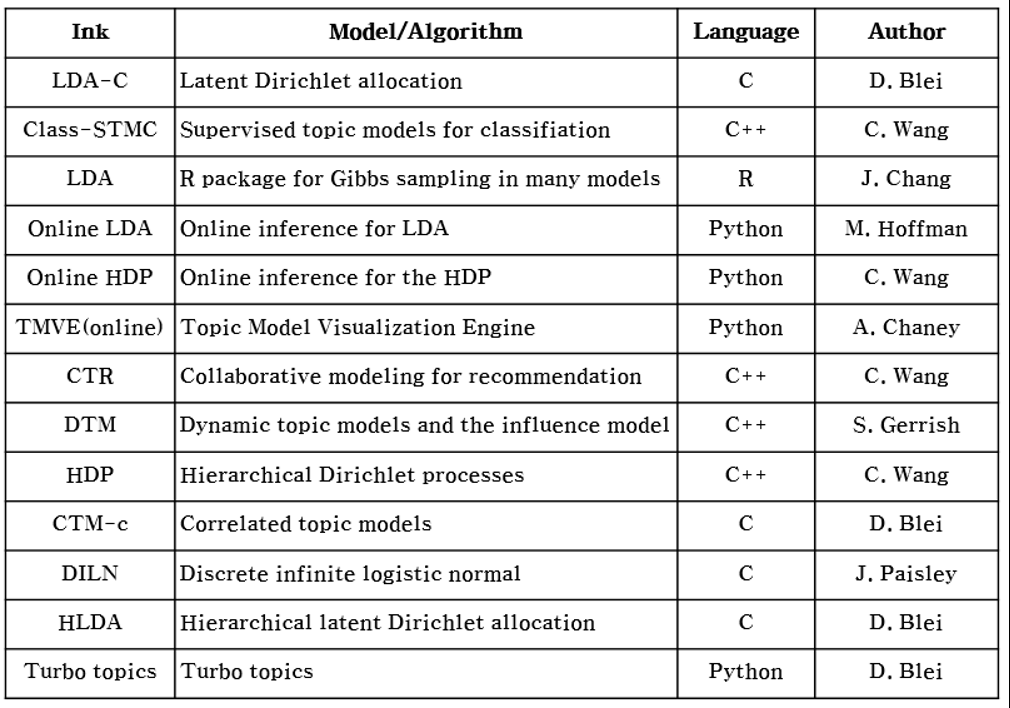

대표적인 알고리즘은 LDA이다.

---
## 3. LDA 원리

이는 LDA 알고리즘에 들어 있는 ‘의미는 관계적이다.’ 라는 전제에 기인한다. 의미는 어휘자체에 내재해 있는 것이 아니라 각 어휘들이 어떤 어휘들의 군집 속에 있는가에 따라서 정해진다. 동일 주제에 속하는 어휘들은 대화 속에서 동시에 나타날 가능성이 크며, 토픽 모델은 구문법(syntax)이나 서사(narative), 혹은 텍스트 내의 위치에 상 관없이 한 문서 내에서 어떤 어휘들이 동시발생(co-occurence)하는가를 측정한다(Mohr and Bogdanov 2013: 546-547). LDA 알고리즘에서 텍 스트뭉치 속에 있는 각각의 문서는 각 저자가 말하고자 하는 주제들에 따라서 생성된 어휘들의 자루(bag of words)로 간주된다
(출처 : 인문사회과학자를 위한 LDA 알고리즘에 대한 기초적 설명으로는 Weingart(2012)와 Rhody(2012), Jockers(2014: 163-165)를 참조하기 바란다. )

쉽게 이해하면 다음과 같다.

	ex) 각 문서마다 구성된 어휘도 다르고 어휘가 비슷하더라도 어휘가 발생하는 비율은 다 서로 다르다. 이를 이용한 것이 LDA이다. LDA 알고리즘은 동일한 토픽에 속하는 어휘는 동일한 문서에 함께 들어 있을 가능성이 높다는 전제하며, 문서 속 동시출현빈도를 측정할 뿐 어휘의 위치나 순서를 고려하지 않는다. 이 같은 LDA 알고리즘은 동일한 어휘라도 함께 사용되는 어 휘들의 조합이 다르면 다른 토픽으로 분류하며, 다른 어휘라도 동일한 의미를 가지고 있어서 유사한 어휘조합에서 사용되면 동일한 토픽으로 분류해준다

---
## 4. 토픽 모델링 장단점

### 1) 장점

토픽모델링 알고리즘의 실행을 위해서는 사전에 정의된 코드나 의미의 범주를 정해줄 필요가 없으며, 단지 토픽의 숫자만 정해주면 자 동적으로 텍스트뭉치로부터 지정된 수의 토픽을 추출해준다

### 2) 단점

토픽의 수만 정해 주면 토픽을 구성하는 어휘들과 각 어휘들이 토픽에 속할 확률을 산출 해주며, 동시에 전체 텍스트뭉치에서 토픽들이 어떻게 분포되는지를 알 수 있기 때문에 정확한 키워드를 뽑아내서 정하려면 문서를 보고 유추 할 수 밖에 없다.



---
## 5. LDA 구현

출처 : http://www.engear.net/wp/topic-modeling-gensimpython/

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
 
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
 
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
 
 
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
 
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

c:\users\selee\appdata\local\programs\python\python37\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [202]:
# 토픽 모델링할 자료 불러오기
df = pd.read_csv('output.csv', index_col=0,sep=',')
df.head()

,id,raw_text,preprossed
0,1810.04158,\r\n While convolutional neural network...,convolut neural network domin field comput vis...
1,1810.04152,\r\n Deep latent variable models have b...,deep latent variabl model becom popular model ...
2,1810.04150,\r\n The success of the exascale superc...,success exascal supercomput larg debat remain ...
3,1810.04147,\r\n Building on the success of deep le...,build success deep learn two modern approach l...
4,1810.04146,"\r\n In this work, we consider the inte...",work consid integr mpi one side commun non blo...


In [205]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations

#전처리된 내용을 word 단위로 split
data_words = list(sent_to_words(df['preprossed']))
print(data_words[:1])

[['convolut', 'neural', 'network', 'domin', 'field', 'comput', 'vision', 'one', 'usual', 'access', 'larg', 'amount', 'domain', 'relev', 'data', 'need', 'train', 'thu', 'becam', 'common', 'use', 'avail', 'synthet', 'sampl', 'along', 'domain', 'adapt', 'scheme', 'prepar', 'algorithm', 'target', 'domain', 'tackl', 'problem', 'differ', 'angl', 'introduc', 'pipelin', 'map', 'unseen', 'target', 'sampl', 'synthet', 'domain', 'use', 'train', 'task', 'specif', 'method', 'denois', 'data', 'retain', 'featur', 'recognit', 'algorithm', 'familiar', 'solut', 'greatli', 'improv', 'perform', 'map', 'easier', 'learn', 'opposit', 'one', 'ie', 'learn', 'gener', 'realist', 'featur', 'augment', 'sourc', 'sampl', 'demonstr', 'whole', 'solut', 'train', 'pure', 'augment', 'synthet', 'data', 'still', 'perform', 'better', 'method', 'train', 'domain', 'relev', 'inform', 'eg', 'real', 'imag', 'realist', 'textur', 'model', 'appli', 'approach', 'object', 'recognit', 'textur', 'less', 'cad', 'data', 'present', 'custo

In [206]:
#바이어그램(ngram 적용 -> 교수님 조언대로 바꿔서 성능 테스트하기)
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # 
 
#바이어그램을 효율 높이기
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

#바이어그램 적용 결과 예시
print(data_words[0][:10])
print(data_words_bigrams[0][:10])

['convolut', 'neural', 'network', 'domin', 'field', 'comput', 'vision', 'one', 'usual', 'access']
['convolut_neural', 'network', 'domin', 'field', 'comput_vision', 'one', 'usual', 'access', 'larg', 'amount']


In [211]:
#토픽 모델링 적용을 위해 숫자로 바꿈
#단어를 숫자에 대응시켜 dictionary 만듦
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

[(id2word[id], freq) for id, freq in corpus[0]][:5]

[('access', 1), ('achiev', 1), ('adapt', 1), ('algorithm', 2), ('along', 1)]

In [19]:
#abstract 전체를 대상으로 lda_model 만들기
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
id2word=id2word,
num_topics=20,
random_state=100,
update_every=1,
chunksize=100,
passes=10,
alpha='auto',
per_word_topics=True)

In [78]:
topicTable = pd.DataFrame([id2word[word[0]] for word in lda_model.get_topic_terms(idx)] for idx in range(20))
topicTable_prob = pd.DataFrame([(id2word[word[0]],word[1]) for word in lda_model.get_topic_terms(idx)] for idx in range(20))

In [79]:
topicTable #각 토픽별 구성단어만 표시

,0,1,2,3,4,5,6,7,8,9
0,estim,depth,map,pose,measur,throughput,postur,bias,idea,high
1,control,robot,simul,variabl,physic,forc,manipul,synthesi,constraint,popul
2,graph,class,program,regular,classifi,structur,problem,instanc,process,properti
3,servic,network,scheme,iot,system,provid,applic,smart,manag,fair
4,network,optim,user,power,commun,problem,propos,less,signal,nois
5,dnn,traffic,capac,rl,cloud,stochast,vehicl,version,size,server
6,rule,cluster,privaci,prefer,heurist,emerg,adversari_exampl,search,lock,batch
7,adversari,attack,secur,reliabl,face,robust,practic,acceler,browser,probe
8,theori,ai,databas,cover,built,role,event,evid,preliminari,join
9,network,layer,neural,cnn,convolut,accuraci,architectur,classif,convolut_neural,higher


In [80]:
topicTable_prob #각 토픽별 구성 단어와 확률 표시

,0,1,2,3,4,5,6,7,8,9
0,"(estim, 0.10112776)","(depth, 0.029796924)","(map, 0.026015446)","(pose, 0.021431612)","(measur, 0.020394862)","(throughput, 0.018438179)","(postur, 0.013864575)","(bias, 0.013158605)","(idea, 0.011879978)","(high, 0.011213018)"
1,"(control, 0.061686784)","(robot, 0.026619328)","(simul, 0.01611558)","(variabl, 0.015012947)","(physic, 0.014269762)","(forc, 0.014078483)","(manipul, 0.013864578)","(synthesi, 0.013512968)","(constraint, 0.013120249)","(popul, 0.011250081)"
2,"(graph, 0.0509982)","(class, 0.022766465)","(program, 0.019990118)","(regular, 0.018338017)","(classifi, 0.016288005)","(structur, 0.014910552)","(problem, 0.0148364175)","(instanc, 0.013636962)","(process, 0.012399812)","(properti, 0.011052591)"
3,"(servic, 0.026910681)","(network, 0.025747688)","(scheme, 0.020015625)","(iot, 0.019906191)","(system, 0.017862823)","(provid, 0.017174067)","(applic, 0.016913721)","(smart, 0.013754162)","(manag, 0.0123727545)","(fair, 0.011669688)"
4,"(network, 0.025587903)","(optim, 0.01453896)","(user, 0.013667429)","(power, 0.013625774)","(commun, 0.012595702)","(problem, 0.012495336)","(propos, 0.012349169)","(less, 0.012062717)","(signal, 0.010489855)","(nois, 0.01010223)"
5,"(dnn, 0.022129057)","(traffic, 0.021164397)","(capac, 0.020980347)","(rl, 0.019634927)","(cloud, 0.018349193)","(stochast, 0.018174734)","(vehicl, 0.017031875)","(version, 0.015827633)","(size, 0.014406478)","(server, 0.014265714)"
6,"(rule, 0.051348656)","(cluster, 0.0456868)","(privaci, 0.021969998)","(prefer, 0.021167584)","(heurist, 0.020386256)","(emerg, 0.018186536)","(adversari_exampl, 0.018138397)","(search, 0.01534131)","(lock, 0.014188766)","(batch, 0.012883898)"
7,"(adversari, 0.0669306)","(attack, 0.051866326)","(secur, 0.03412199)","(reliabl, 0.024309304)","(face, 0.017443746)","(robust, 0.013000649)","(practic, 0.012701441)","(acceler, 0.012502243)","(browser, 0.011298964)","(probe, 0.011297839)"
8,"(theori, 0.02968235)","(ai, 0.027763043)","(databas, 0.027031517)","(cover, 0.021177975)","(built, 0.01793113)","(role, 0.016918669)","(event, 0.016259281)","(evid, 0.014288984)","(preliminari, 0.013973219)","(join, 0.012054708)"
9,"(network, 0.097124726)","(layer, 0.041924793)","(neural, 0.026855808)","(cnn, 0.022985257)","(convolut, 0.02206554)","(accuraci, 0.02064174)","(architectur, 0.019052943)","(classif, 0.014294706)","(convolut_neural, 0.013795163)","(higher, 0.013668283)"


In [212]:
#get_document_topics를 이용한 각 문서별 토픽 추출 
#Topic distribution for the whole document. Each element in the list is a pair of a topic’s id, and the probability that was assigned to it.
documentTopicTable = pd.DataFrame([freq[0] for freq in lda_model.get_document_topics(corpus[idx])] for idx in range(1000)) #토픽 번호만 표시
documentTopicTable_prob = pd.DataFrame([freq[1] for freq in lda_model.get_document_topics(corpus[idx])] for idx in range(1000)) #토픽 확률만 표시

#dataframe 사이즈 재조정
documentTopicTable_prob = documentTopicTable_prob.iloc[:,0:12]
documentTopicTable = documentTopicTable.iloc[:,0:12]


documentTopicTable_prob.insert(loc=0, column='mainTopicIdx', value= documentTopicTable_prob.idxmax(axis=1)) #documentTopicTable에서 몇번째 인덱스 값 확률이 가장 높은지 
documentTopicTable_prob.head()

,mainTopicIdx,0,1,2,3,4,5,6,7,8,9,10,11
0,2,0.084247,0.206123,0.629555,0.010414,0.037458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.336816,0.052588,0.157477,0.117124,0.188911,0.046843,0.069037,0.015399,NaN,NaN,NaN,NaN
2,5,0.012353,0.239903,0.012908,0.012549,0.037791,0.286292,0.151901,0.039771,0.179988,NaN,NaN,NaN
3,6,0.033985,0.096351,0.010537,0.016738,0.083541,0.270177,0.467848,NaN,NaN,NaN,NaN,NaN
4,3,0.040723,0.018043,0.014666,0.709483,0.098487,0.079323,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
#각 초록별로 가장 분포 확률이 높은 토픽 번호 추출
mainTopic= []
for row in range(1000):
    col = documentTopicTable_prob['mainTopicIdx'][row]
    mainTopic.append(documentTopicTable[col][row])
documentTopicTable.insert(loc=0, column='mainTopic', value= mainTopic)
documentTopicTable.head()

,mainTopic,0,1,2,3,4,5,6,7,8,9,10,11
0,15.0,7,13,15,16,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,2,4,13,15.0,17.0,18.0,19.0,NaN,NaN,NaN,NaN
2,13.0,0,4,7,8,9.0,13.0,15.0,18.0,19.0,NaN,NaN,NaN
3,18.0,2,4,7,9,13.0,15.0,18.0,NaN,NaN,NaN,NaN,NaN
4,13.0,4,11,12,13,15.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.496714147808428

Coherence Score:  0.3830923615652752


궁금한점
1. 논문에서 대표 토픽 추출하는 과정과 gensim lda 함수인 get_documents_topics 중 무엇이 나을까?
2. 위 함수는 어떤 과정에서 뽑은 것일까?
3. 초록은 이미 핵심적인 단어들만 뽑는거라서 논문에서 분석하는 방식은 우리와 맞지 않겠다라는 생각이 들음.

논문 방식
1. 각 논문에 있는 모든 단어를 카운트한다.
2. 논문을 대상으로 토픽 모델링을 통해 토픽 20개를 뽑는다.
3. 논문 속 워드 발생 비율과 해당 단어가 포함된 토픽 구성 단어 비율을 더한다.
    이를 통해 논문별로 각 토픽 구성단어들이 얼마나 포함되어있는지를 계산한다.
의문점이 든 이유 : 논문에서 쓴 방식은 논문에 있는 모든 단어를 카운트 했기때문에 높은 카운트 수를 포함한 단어가 대표성이 있다고 느껴지지만
우리팀 같은 경우 초록을 이용하기 때문에 이미 핵심단어만 추린 것이고, 거기서 카운트 한다면 그냥 자주 쓰는 단어??만 대표적인 단어라고 뽑힐 것 같기 때문.